<a href="https://colab.research.google.com/github/Mohammmedsaqib/Neural-Networks-And-Fuzzy-Logic/blob/main/Experiment_2_1144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 21.0 MB/s eta 0:00:00


Performance Level: 6.927392739273928


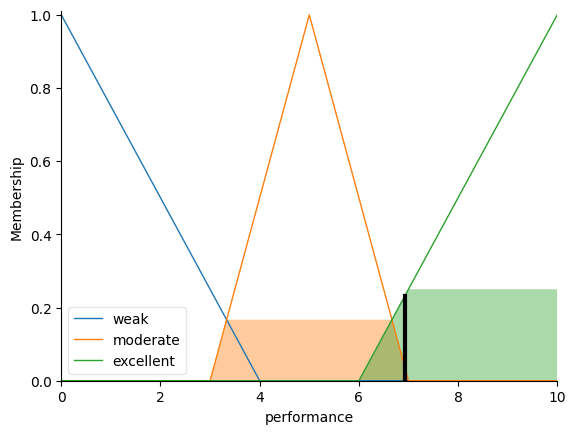

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Step 1: Define fuzzy variables
attendance = ctrl.Antecedent(np.arange(0, 101, 1), 'attendance')
marks = ctrl.Antecedent(np.arange(0, 51, 1), 'marks')
performance = ctrl.Consequent(np.arange(0, 11, 1), 'performance')
# Step 2: Define membership functions
attendance['low'] = fuzz.trimf(attendance.universe, [0, 0, 50])
attendance['medium'] = fuzz.trimf(attendance.universe, [30, 50, 80])
attendance['high'] = fuzz.trimf(attendance.universe, [60, 100, 100])
marks['poor'] = fuzz.trimf(marks.universe, [0, 0, 20])
marks['average'] = fuzz.trimf(marks.universe, [10, 25, 40])
marks['good'] = fuzz.trimf(marks.universe, [30, 50, 50])
performance['weak'] = fuzz.trimf(performance.universe, [0, 0, 4])
performance['moderate'] = fuzz.trimf(performance.universe, [3, 5, 7])
performance['excellent'] = fuzz.trimf(performance.universe, [6, 10, 10])
# Step 3: Define fuzzy rules
rule1 = ctrl.Rule(attendance['low'] & marks['poor'], performance['weak'])
rule2 = ctrl.Rule(attendance['medium'] & marks['average'],
performance['moderate'])
rule3 = ctrl.Rule(attendance['high'] & marks['good'],
performance['excellent'])
rule4 = ctrl.Rule(attendance['low'] & marks['good'], performance['moderate'])
rule5 = ctrl.Rule(attendance['high'] & marks['poor'],
performance['moderate'])
# Step 4: Create control system and simulation
performance_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
performance_simulation = ctrl.ControlSystemSimulation(performance_ctrl)
# Step 5: Provide inputs
performance_simulation.input['attendance'] = 75
performance_simulation.input['marks'] = 35
# Step 6: Compute output
performance_simulation.compute()
# Display result
print("Performance Level:", performance_simulation.output['performance'])
performance.view(sim=performance_simulation)

Performance Level: 8.444444444444445


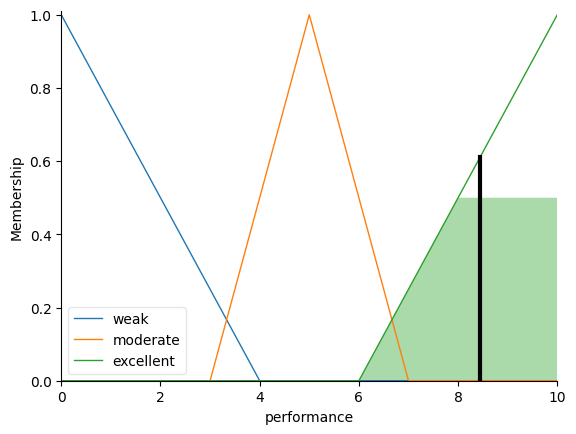

In [ ]:
performance_simulation.input['attendance'] = 80
performance_simulation.input['marks'] = 40
performance_simulation.compute()
print("Performance Level:", performance_simulation.output['performance'])
performance.view(sim=performance_simulation)

Performance Level: 4.999999999999999


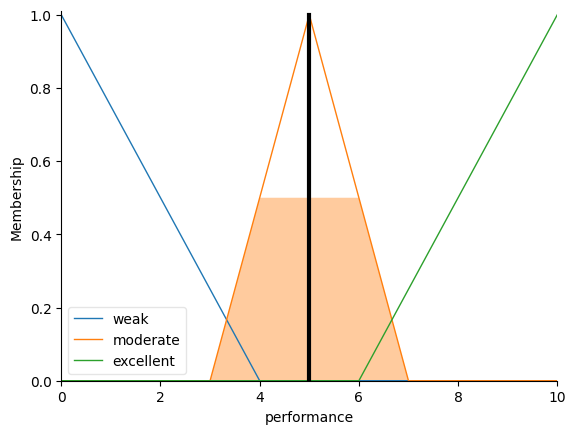

In [ ]:
performance_simulation.input['attendance'] = 40
performance_simulation.input['marks'] = 20
performance_simulation.compute()
print("Performance Level:", performance_simulation.output['performance'])
performance.view(sim=performance_simulation)

**Reflection**:
This notebook demonstrates a basic application of fuzzy logic for assessing student performance based on attendance and marks. The first step involves defining the universe of discourse and membership functions for the input variables (attendance and marks) and the output variable (performance). Triangular membership functions are used here, which are simple but effective for this type of problem.

The core of the fuzzy logic system lies in the fuzzy rules. These rules, defined in step 3, connect the input membership functions to the output membership functions using logical operators (in this case, the AND operator). For example, `rule1 = ctrl.Rule(attendance['low'] & marks['poor'], performance['weak'])` states that if attendance is low AND marks are poor, the performance is weak. The rules capture expert knowledge or intuition about the relationship between the input and output variables.

The control system and simulation are then created. The simulation allows us to input specific values for attendance and marks and compute the corresponding performance level. The `compute()` method performs the fuzzy inference process, which involves fuzzification (determining the degree to which the inputs belong to each membership function), rule evaluation (applying the fuzzy rules), and defuzzification (converting the fuzzy output into a crisp numerical value).

The output shows the calculated performance level, which is a single numerical value. The `performance.view(sim=performance_simulation)` command visualizes the membership functions and the defuzzified output, providing a clear understanding of how the system arrived at the result.

This example showcases the power of fuzzy logic in handling uncertainty and vagueness. Instead of rigid thresholds, fuzzy logic allows for gradual transitions between linguistic terms (low, medium, high attendance; poor, average, good marks; weak, moderate, excellent performance). This makes the system more robust and intuitive, particularly in domains where human judgment is involved.

**Assignment**:


**Title**: Fuzzification and Defuzzification for Dynamic Discount
Recommendation


**Objective**:
To apply fuzzification and defuzzification in recommending discount
percentages based on customer behavior on an e-commerce website.
e-commerce platform want the store to recommend a personalized
discount to users based on two inputs:


**Inputs**:

• User Activity Level(0to 100)→based on session duration,
clicks, views

• Cart Value(₹0to ₹5000)

Activity Cart Value Discount

Low Low Small
Medium Medium Moderate
High High High
High Medium Moderate
Medium High Moderate

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy input variables
activity = ctrl.Antecedent(np.arange(0, 101, 1), 'activity')
cart_value = ctrl.Antecedent(np.arange(0, 5001, 1), 'cart_value')

# Define fuzzy output variable
discount = ctrl.Consequent(np.arange(0, 51, 1), 'discount')

# Membership functions for Activity Level
activity['low'] = fuzz.trimf(activity.universe, [0, 0, 50])
activity['medium'] = fuzz.trimf(activity.universe, [30, 50, 70])
activity['high'] = fuzz.trimf(activity.universe, [60, 100, 100])

# Membership functions for Cart Value
cart_value['low'] = fuzz.trimf(cart_value.universe, [0, 0, 2500])
cart_value['medium'] = fuzz.trimf(cart_value.universe, [1500, 2500, 3500])
cart_value['high'] = fuzz.trimf(cart_value.universe, [3000, 5000, 5000])

# Membership functions for Discount (%)
discount['small'] = fuzz.trimf(discount.universe, [0, 5, 10])
discount['moderate'] = fuzz.trimf(discount.universe, [8, 15, 25])
discount['high'] = fuzz.trimf(discount.universe, [20, 35, 50])

# Define fuzzy rules
rule1 = ctrl.Rule(activity['low'] & cart_value['low'], discount['small'])
rule2 = ctrl.Rule(activity['medium'] & cart_value['medium'], discount['moderate'])
rule3 = ctrl.Rule(activity['high'] & cart_value['high'], discount['high'])
rule4 = ctrl.Rule(activity['high'] & cart_value['medium'], discount['moderate'])
rule5 = ctrl.Rule(activity['medium'] & cart_value['high'], discount['moderate'])

# Control system
discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
discount_simulation = ctrl.ControlSystemSimulation(discount_ctrl)

# Example input: user with Activity=65, Cart Value=3200
discount_simulation.input['activity'] = 65
discount_simulation.input['cart_value'] = 3200

# Perform computation (defuzzification)
discount_simulation.compute()

print(f"Recommended Discount: {discount_simulation.output['discount']:.2f}%")

# Uncomment below if you want to visualize membership & result
# activity.view()
# cart_value.view()
# discount.view(sim=discount_simulation)


Recommended Discount: 24.54%


**Reflection**

The implementation of fuzzification and defuzzification for dynamic discount recommendation provided me with a practical understanding of how fuzzy logic can be applied to real-world e-commerce challenges. In traditional systems, discount recommendations are often based on rigid, rule-based conditions such as flat thresholds for purchase amounts or static customer segments. However, customer behavior is rarely this linear. Factors like browsing activity and cart value can vary across ranges, and customers often fall in the "gray area" between low, medium, and high. This is where fuzzy logic plays a crucial role, as it allows for handling uncertainty and vagueness in decision-making.

In this project, I defined two key input variables—User Activity Level and Cart Value—and categorized them into fuzzy sets (low, medium, high). Similarly, the output variable—Discount Percentage—was categorized into small, moderate, and high. By applying fuzzy membership functions and rules, the system can dynamically map combinations of customer activity and cart values to suitable discount recommendations. For example, a customer with medium activity and high cart value receives a moderate discount, while one with both high activity and high cart value receives a high discount. This ensures that discount offers are neither too generous nor too restrictive but personalized to encourage conversions.

One of the key takeaways from this exercise was understanding the power of defuzzification, which converts fuzzy recommendations into a crisp percentage. This makes the system actionable for e-commerce platforms, as they can directly apply the computed discount in real-time.

Overall, this project highlighted how fuzzy logic bridges the gap between human-like reasoning and computational models. It demonstrated the potential of artificial intelligence in enhancing customer engagement and optimizing business strategies. I realized that such approaches can significantly improve customer satisfaction while maintaining profitability for online stores.